In [2]:
from __future__ import division, print_function, unicode_literals

In [3]:
import numpy as np 
import os

In [4]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [6]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

In [7]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [8]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [9]:
import tensorflow as tf

In [10]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``im

## Filters

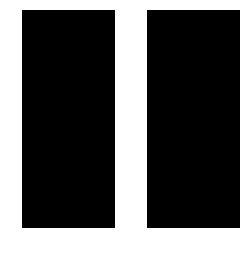

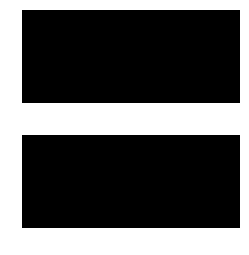

In [11]:
fmap = np.zeros(shape=(7,7,1,2), dtype = np.float32)
fmap[:,3,0,0] = 1 # fmap is like the "inverse" of the map function
fmap[3,:,0,1] = 1 
plot_image(fmap[:,:,0,0]) 
plt.show()
plot_image(fmap[:,:,0,1])
plt.show()

In [12]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

In [13]:
with tf.Session() as sess:
        output = convolution.eval(feed_dict={X: images})

Saving figure china_original


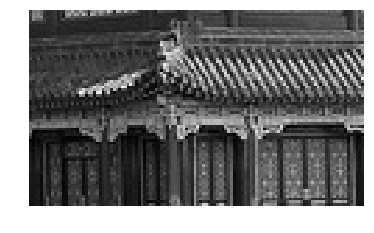

In [14]:
plot_image(images[0,:,:,0])
save_fig("china_original", tight_layout=False) # makes sure you made the /images/cnn folders
# If you don't make the folders it will probably still run, I'm guessing by storing it in RAM 
# which is not persistent storage so it will not save the images.
plt.show()

Saving figure china_vertical


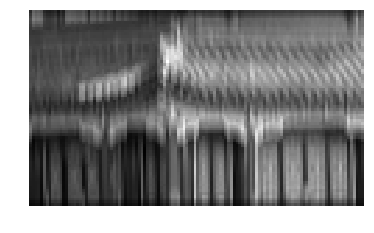

In [15]:
plot_image(output[0,:,:,0])
save_fig("china_vertical", tight_layout=False)
plt.show()

Saving figure china_horizontal


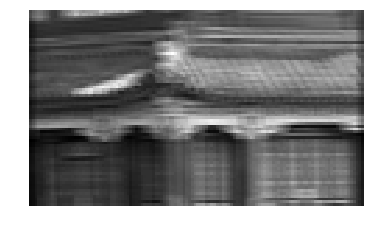

In [16]:
plot_image(output[0,:,:,1])
save_fig("china_horizontal", tight_layout=False)
plt.show()

In [17]:
import numpy as np
from sklearn.datasets import load_sample_images

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/anaconda3/lib/python3.6/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``im

In [18]:
filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

In [19]:
X = tf.placeholder(tf.float32, shape = (None, height,width,channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
        output = sess.run(convolution, feed_dict={X: dataset})

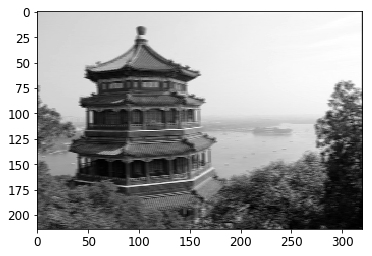

In [20]:
plt.imshow(output[0,:,:,1], cmap="gray")
plt.show()

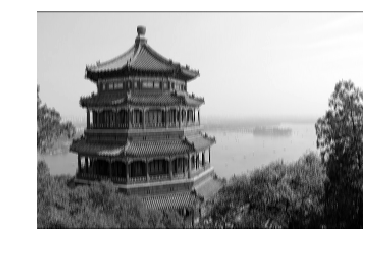

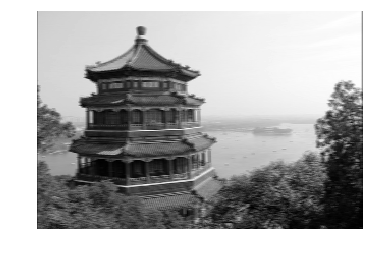

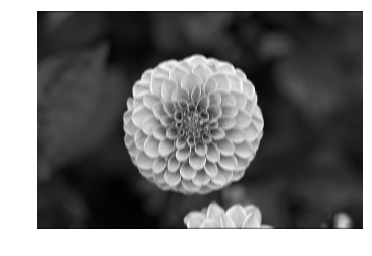

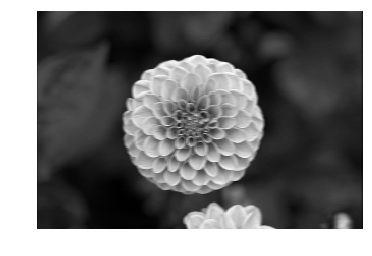

In [21]:
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

In [22]:
reset_graph()

X = tf.placeholder(shape = (None, height,width,channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="SAME")

In [23]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})

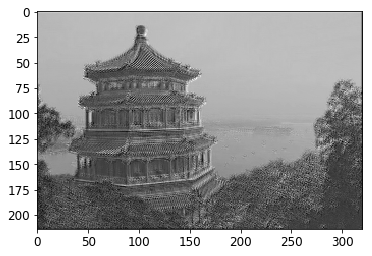

In [24]:
plt.imshow(output[0,:,:,1], cmap="gray")
plt.show()

## New Material Starts Here
Code above is from the previous Friday workshop. Code below is new.

In [25]:
batch_size, height, width, channels = dataset.shape

filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)
filters[:,3,:,0] = 1
filters[3,:,:,1] = 1

### Clarification On Strides and Kernels
![](https://qph.fs.quoracdn.net/main-qimg-3a4f6d2287845484c5a23898c1d933e4.webp)

The green box is the kernel and the stride is how many pixels it moves per iteration. It scans over the image.

## Pooling
![](https://brohrer.github.io/images/cnn8.png)

Larger kernel sizes cause more information to be lost when pooling and also select for higher level features. 

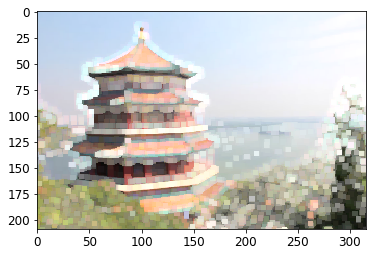

In [35]:
X = tf.placeholder(tf.float32, shape=(None,height,width,channels))
max_pool = tf.nn.max_pool(X, ksize=[1,10,10,1], strides=[1,2,2,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})
    
plt.imshow(output[0].astype(np.uint8))
plt.show()

Saving figure china_original


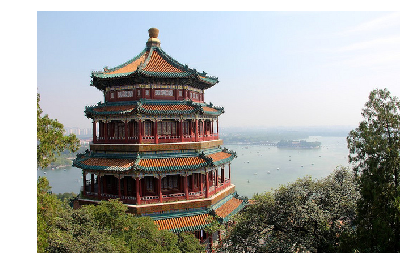

Saving figure china_max_pool


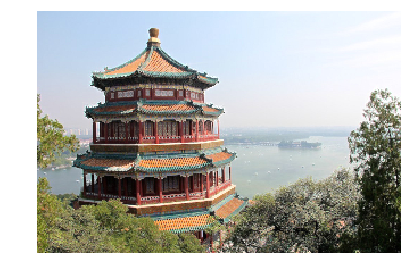

In [28]:
plot_color_image(dataset[0])
save_fig("china_original")
plt.show()

plot_color_image(output[0])
save_fig("china_max_pool")
plt.show()

## MNIST CNN Example

In [58]:
height = 28
width = 28
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_fc1 = 64
n_outputs = 10

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])

with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")

with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [59]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [60]:
n_epochs = 10
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model")

0 Train accuracy: 0.99 Test accuracy: 0.9759
1 Train accuracy: 0.99 Test accuracy: 0.9803
2 Train accuracy: 0.97 Test accuracy: 0.9832
3 Train accuracy: 1.0 Test accuracy: 0.9872
4 Train accuracy: 1.0 Test accuracy: 0.9885
5 Train accuracy: 0.97 Test accuracy: 0.9885
6 Train accuracy: 1.0 Test accuracy: 0.9899
7 Train accuracy: 0.99 Test accuracy: 0.989
8 Train accuracy: 1.0 Test accuracy: 0.9881
9 Train accuracy: 1.0 Test accuracy: 0.9885


## Lucid 
Lucid is a continuation of the [Deep Dream project](https://research.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html) by Google.

[Lucid Github](https://github.com/tensorflow/lucid)

[Lucid Tutorial in Jupyter (beta)](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb)

#### Cool lucid articles on CNN's

https://distill.pub/2017/feature-visualization/#enemy-of-feature-vis

https://distill.pub/2018/building-blocks/

More are listed on the lucid github page, check them out!